Привет, Максим!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься, я уверен. 

# Сборный проект
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо тебе за оформление оглавления к проекту. 

## Открытие файла и изучение общей информации

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По первичному анализу данных можно сделать следующие выводы:
- присутствует много пропусков;
- не все столбцы имеют корректный тип данных

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Первичная информация о данных получена. Мы ознакомились с данными первично и составили первое представление о них. 

## Подготовка данных

Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()

Преобразуем данные в нужные типы.

In [5]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float32')

План обработки пропусков:
- name - малое кол-во пропусков, не повлияет на дальнейший анализ. для чистоты данных удалим;
- genre - малое кол-во пропусков, не повлияет на дальнейший анализ. для чистоты данных удалим;
- year_of_release - не очень важный для анализа столбец, однако заполнить его медианами не представляется возможным, т.к. может повлиять на анализ - оставим как есть
- critic_score - важный столбец, который никак не заменить и лучше всего подставить заглушку;
- user_score - важный столбец, который никак не заменить и лучше всего подставить заглушку;
- rating - в виду отcутствия данных заменим пропуски на "no rating"

Возможные причины возникновения пропусков:
- name and genre - возможна ошибка при выгрузке данных, так как эти значения точно должны быть у каждой записи;
- critic_score and user_score - возможное отсутствие отзывов/ревью или их необходимого кол-ва для аггрегации на портале;
- rating - возможно игра не проходила такую сертификацию или данные не были подгружены
- year of release - отстутвие данных введу малого наличия желающих заполнить эти данные (малоизвестные игры)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А тут лучше всего переводить в float32, так как это поможем сэкономить вычислительную память.

# **<font color="maroon">привел в соответствие</font>**

In [6]:
data = data.dropna(subset=['genre', 'name'])

Для корректного преобразования необходимо было избавиться от строк "TBD" в стоблце user_score. Так как to be determined - это отсутствие на данный момент рейтинга, были заменены на Nan.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А еще тут надо высказаться о причинах возникновения прпоусков.  А еще надо описать как поступаем с другими прпоусками.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

# **<font color="maroon">высказался выше</font>**

Заполним пропуски значением -1

In [7]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

data['rating'] = data['rating'].fillna('no rating')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float32
 10  rating           16713 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Согласен. Тут пропуски оптимально никак не заменить и лучше всего подставить заглушку 

Проверим дубликаты

In [9]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Полные дубликаты отсутствуют. Дубликаты возможны при перевыпуске существующих игр на разных платформах, на анализ это не повлияет 

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [10]:
data['sales_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А тут можно использовать такой метод `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А вот тут стоит добавить промежуточный вывод по итогу раздела + нене вижу проверки на дубли. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Превосходно и здесь 

# **<font color="maroon">привел в соответствие</font>**

Можно сделать следующий вывод:
- большая часть необходимых данных присутствует;
- оценки критиков и пользователей отсутствовали возможно в связи с их реальным отсутствием. Пропуски были заменены заглушками для сохранения целостности дальнейшего анализа;
- был выведен столбец общих продаж во всех регионах;
- полных дубликатов обнаружено не было

Таким образом, данные обработаны и готовы для исследовательского анализа

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

In [11]:
def bar_maker(groupby_column, func, title, y='name'):
    df_to_plot = data.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, title=title)
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, title=title)

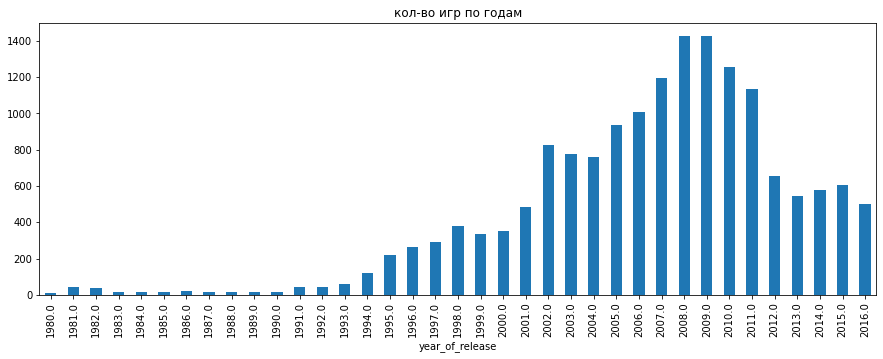

In [12]:
bar_maker('year_of_release', 'count','кол-во игр по годам')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Классный график получился. По нему мы видим, как ведет себя выпуск платформ с каждым годом. 

Видим, что ввиду развития сферы, основной интерес представляют данные с 1991 по 2016 года, т.к. там наблюдается самый большой объем выпущенных игр

Посмотрим, как менялись продажи по платформам

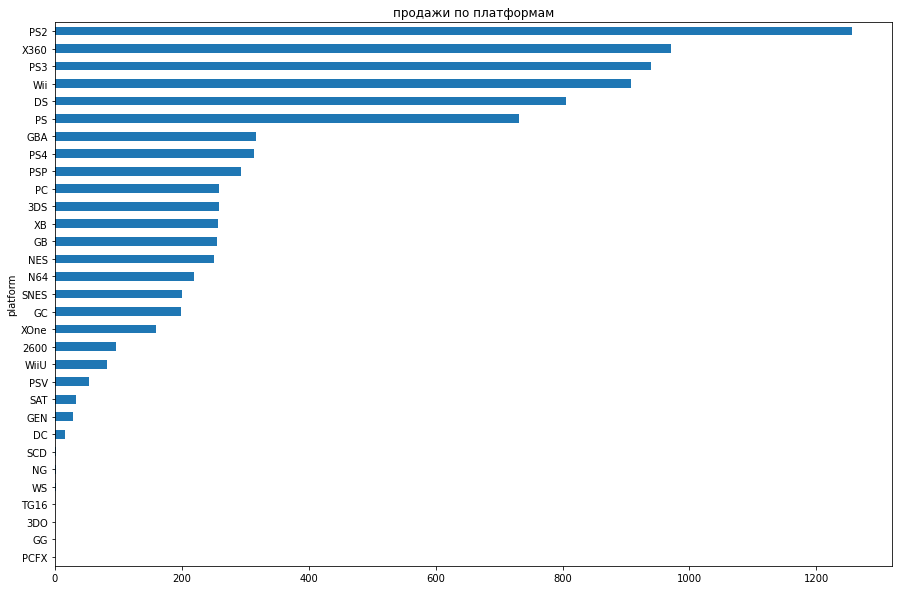

In [13]:
bar_maker('platform', 'sum', "продажи по платформам", 'sales_total')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рейтинг по сумаарным продажам получен. 

Будем рассматривать самые популярные платформы - PS2, X360, PS3, WII, DS, PS, GBA, PS4, PSP, PC

<AxesSubplot:title={'center':'Сравнение по самым большим платформам'}, xlabel='year_of_release'>

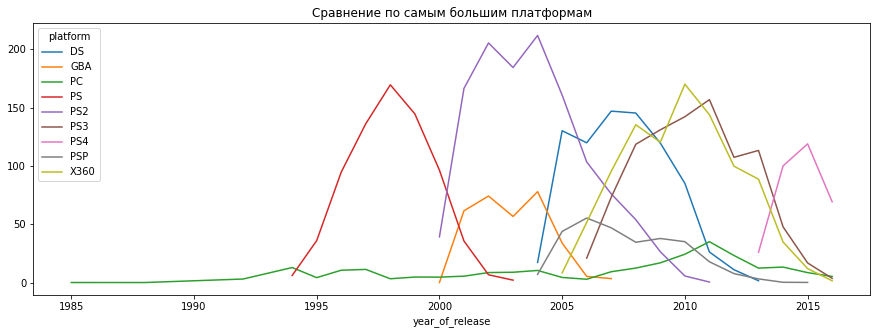

In [14]:
test = data.query('platform in ("PS2", "X360", "PS3", "WII", "DS", "PS", "GBA", "PS4", "PSP", "PC")')
target1 = pd.pivot_table(test, index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
target1.plot(figsize = (15,5), title='Сравнение по самым большим платформам')

Можно сделать следующие выводы:
- разнообразные игровые консоли появляются на рынке, достигают пика примерно через 2.5 года после выхода, а далее идут на спад
- новые платформа появляются примерно через 10 лет после выхода предыдущей модели
- персональные компьютеры занимают маленькую но стабильную нишу

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

По выводу превосходно вышло. 

За актуальный период возьмем 2013 год - учитываем быстрый тем жизни игровой индустрии

<AxesSubplot:title={'center':'Сравнение за актуальный период'}, xlabel='year_of_release'>

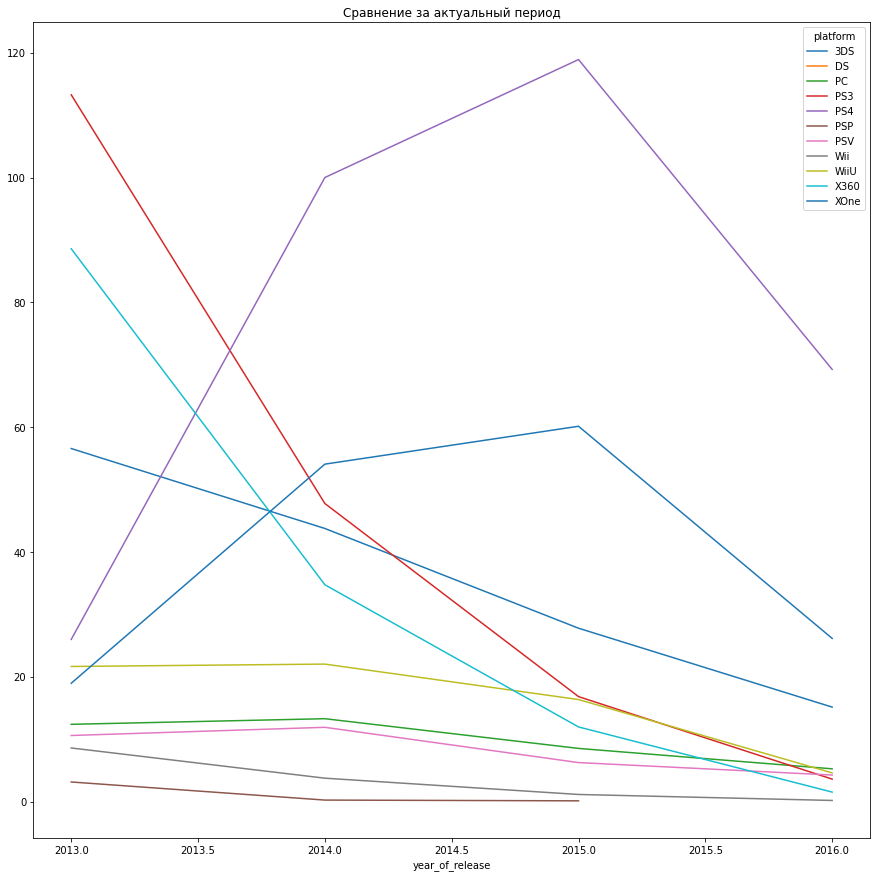

In [15]:
test2 = data.query('year_of_release >= 2013')
target2 = pd.pivot_table(test2, index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')
target2.plot(figsize = (15,15), title='Сравнение за актуальный период')

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А тут стоит сделать так, чтобы легенда не перекрывала кривые с данными.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А тут надо сделать чуть иначе. Все же прогноз в крупных компаниях правильно считать за последние 2-3 года. А у тебя сфера видеоигр где все быстро меняется и легко отловать отжившие тренды.

# **<font color="maroon">увеличил масштаб и скорректировал актуальный период</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
А теперь превосходно получилось

Лидеры продаж на конец актуального периода:
- PS4;
- XOne
- 3DS;
- PC;
- WiiU

Также замечается уменьшение срока жизни консолей - PS4 вышла в 2013 году но уже в 2016 идет на спад

Построим и рассмотрим «ящики с усами»

In [16]:
def boxplot_maker(title=None, query_condition = None, ylims=None):
    if query_condition == None:
        ax = data.boxplot(column='sales_total', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

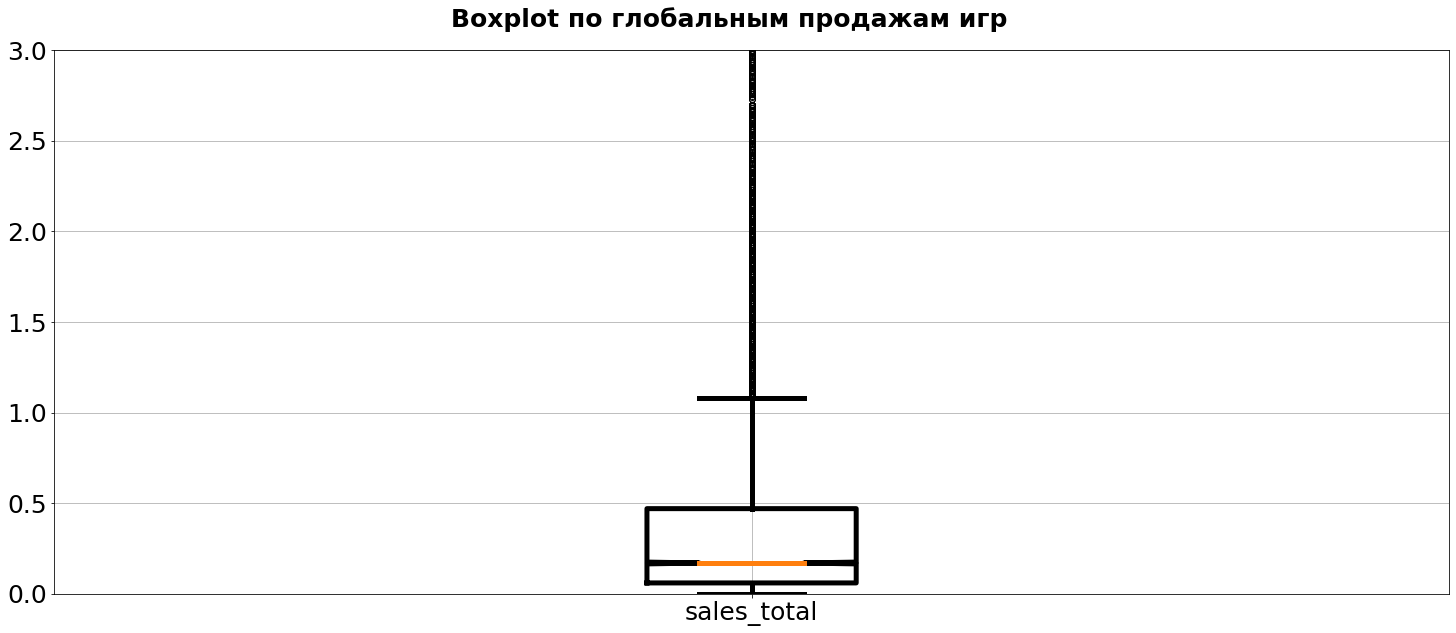

In [17]:
boxplot_maker('Boxplot по глобальным продажам игр', ylims=[0,3])

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов

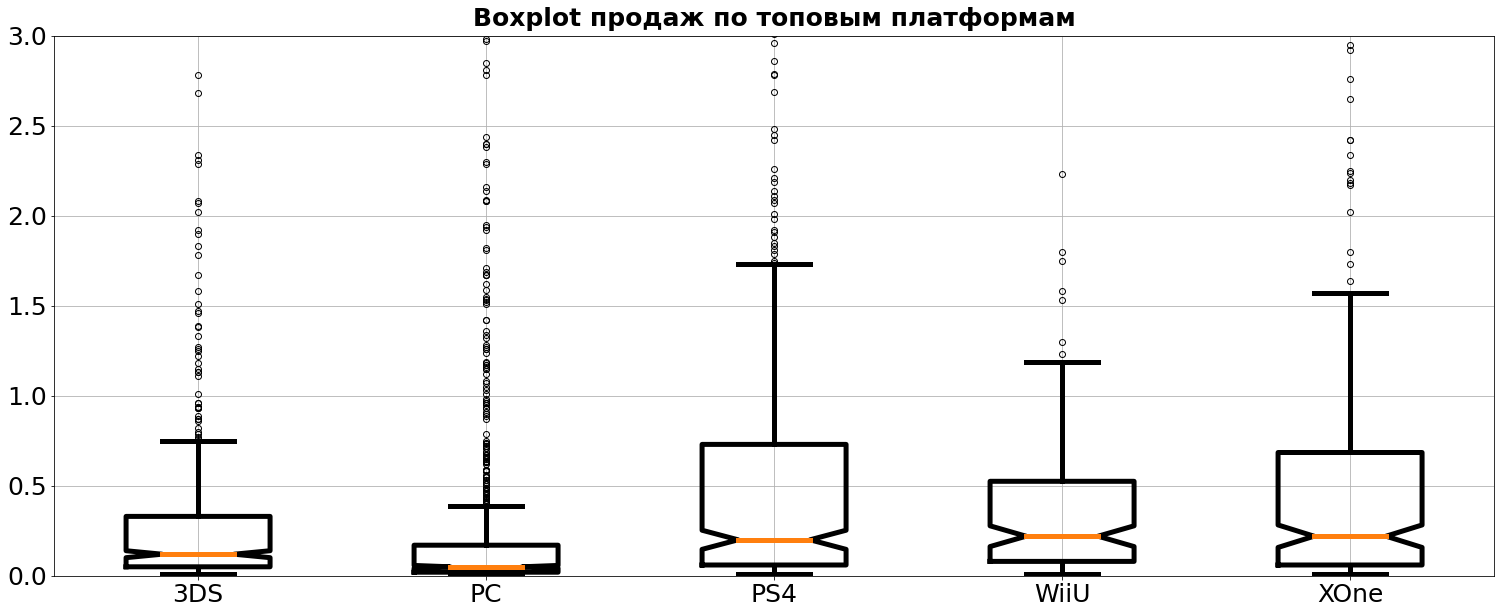

In [18]:
boxplot_maker('Boxplot продаж по топовым платформам', query_condition='platform in (["PS4", "XOne", "3DS", "PC", "WiiU"])', ylims=[0,3])

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Все же стоило тут оставить хотя бы штук 5 наиболее перспективных платформ актуального периода.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Идеально вышло и тут 

# **<font color="maroon"> расширил список платформ</font>**

Выводы:
- медиана примерно на одном уровне - 0,25-0,3, кроме PC - 0.1
- верхние границы - PS4 - 1.7, XOne - 1.55, 3DS - 0.75, WiiU 1.2, PC - 0.4

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Будем рассматривать на примере PS4

In [19]:
data_ps4 = data[(data['platform'] == 'PS4') & (data['critic_score'] > 0)].copy()

<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

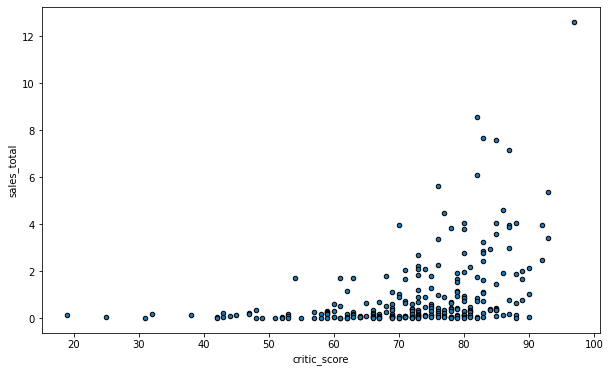

In [20]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

data_ps4.plot(kind='scatter', x='critic_score', y='sales_total', ec='black', figsize=(10,6))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Отличный метод использован для показа зависимости на графике. 

С увеличением рейтинга увеличивается объем продаж

Рассмотрим отзовы пользователей

<AxesSubplot:xlabel='user_score', ylabel='sales_total'>

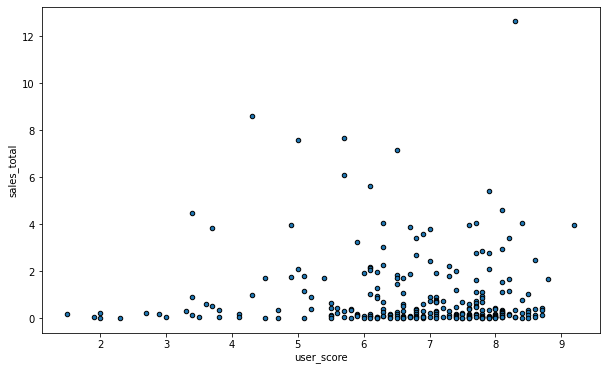

In [21]:
data_ps4 = data[(data['platform'] == 'PS4') & (data['user_score'] > 0)].copy()
data_ps4.plot(kind='scatter', x='user_score', y='sales_total', ec='black', figsize=(10,6))

Можно сделать такой же вывод, но обращаю внимание на увеличение кол-ва выбросов

Постороим матрицу корреляции

<AxesSubplot:>

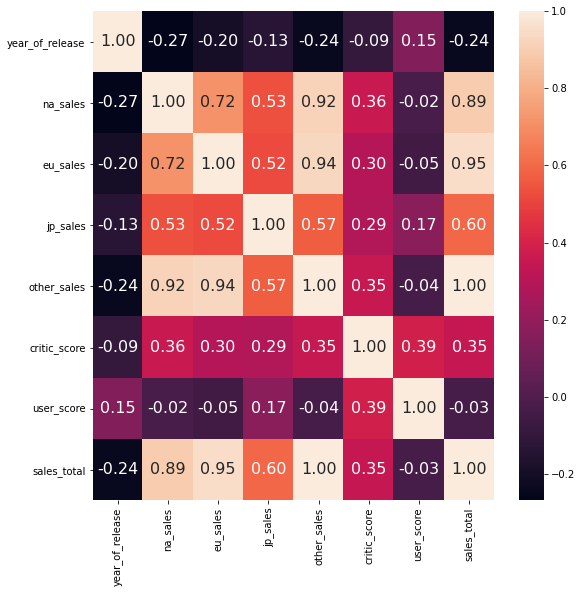

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(data_ps4.corr(), annot=True, fmt='.2f', annot_kws={'size':16})

Оценка критиков слегка влияет на итоговую вырочку, в то время как оценка пользователей - не влияет

Рассмотрим в сравнении с другими топ платформами

In [23]:
top_platforms = ['PS4', 'XOne', '3DS']

def corr_maker(a):
    exp = data[(data['platform'] == a) & (data['user_score'] > 0)].copy()
    exp2 = exp[['sales_total' ,'critic_score', 'user_score']]
    plt.figure(figsize=(1,3))
    sns.heatmap(exp2.corr()[['sales_total']].sort_values(by='sales_total', ascending=False), annot=True, annot_kws={'size':15})
    plt.title(a)

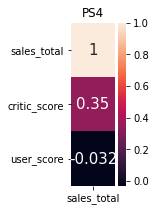

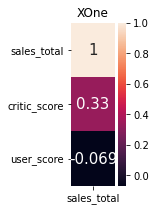

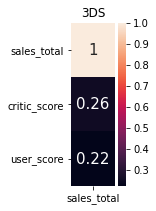

In [24]:
for i in top_platforms:
    corr_maker(i)

В случае PS4 и XOne ситуация совпадает - оценки пользователей практически не влияют на выручку, а оценки критиков влияют. Однако в случае 3DS и оценка критиков и пользователей влияют на итоговую выручку

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Выводы на основе данных нескольких платформ выглялядт убедительнее. 

In [25]:
pivot = data.groupby('genre')['sales_total'].agg(['sum','count','mean','median'])
pivot

,sum,count,mean,median
genre,,,,
Action,1744.17,3369,0.517711,0.19
Adventure,237.59,1303,0.182341,0.05
Fighting,447.53,849,0.527126,0.21
Misc,802.51,1750,0.458577,0.16
Platform,827.77,888,0.932173,0.27
Puzzle,242.57,580,0.418224,0.11
Racing,728.67,1249,0.583403,0.19
Role-Playing,934.56,1498,0.623872,0.18
Shooter,1052.45,1323,0.795503,0.24


Рассмотрим игры по жанрам

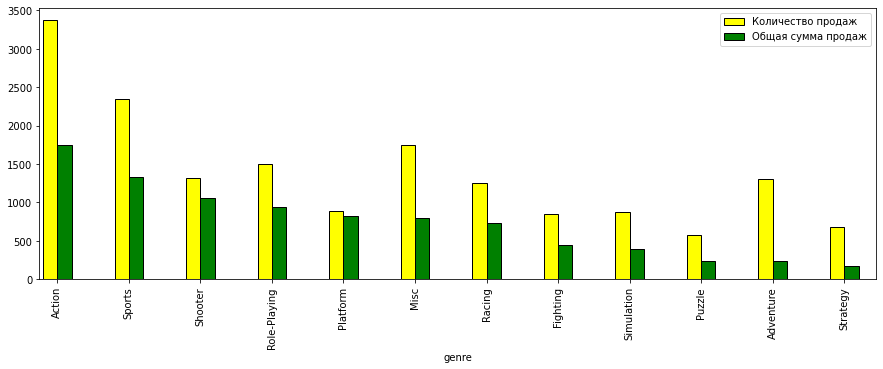

In [26]:
ax = plt.gca()

pivot = data.groupby('genre')['sales_total'].agg(['sum','count','mean','median']).sort_values(by='sum', ascending=False)

plot1 = pivot['count']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='Yellow', position=1)

plot2 = pivot['sum']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='Green', position=0)

ax.legend(['Количество продаж','Общая сумма продаж'])

Топ по колву выпущенных игр:
- Action;
- Sports;
- Misc

Тоp по выручке:
- Action;
- Sports;
- Shooter

Наблюдаем, что самые прибыльные жанры - Action и Sports

Низкие продажи:
- Strategy;
- Adventure;
- Puzzle

Для более полного анализа, рассмотрим также медиану и среднее значение выручки по жанрам

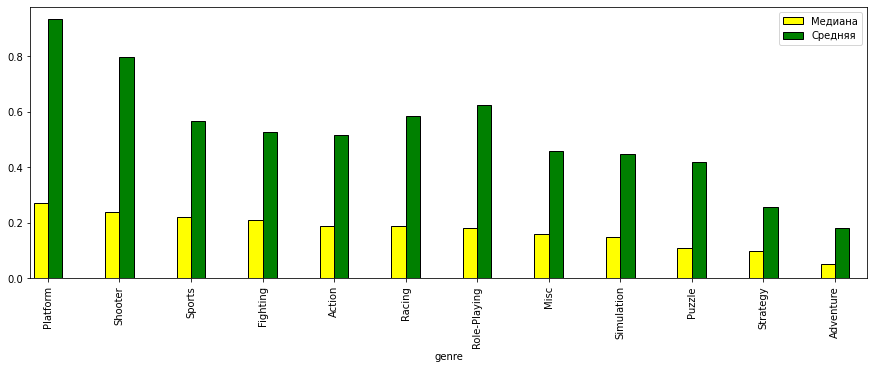

In [27]:
ax = plt.gca()

pivot = pivot.sort_values(by='median', ascending=False)

plot3 = pivot['median']
plot3.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='Yellow', position=1)

plot4 = pivot['mean']
plot4.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='Green', position=0)

ax.legend(['Медиана','Средняя'])

По показателю медианы, самые успешные жанры это:
- platform
- shooter
- sports

По показателю средней, самые успешные жанры это:
- platform
- shooter
- role-playing

Можно сделать следующие выводы:
- по показателю выручки медианы, самый привлекательный жанр - это платформер
- высокие показатели средних говорят, что во многих жанрах есть игры-победители, которые вырываются вперед по сравнению с конкурентами

Таким образом, вырисовывается закономерность, что можно как и идти за популярными жанрами, так и стараться сделать выдающийся товар в каком-то конкретном жанре, и повести покупателя за собой

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.

# **<font color="maroon">рассмотрел медианы и средние, сделал выводы</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

## Портрет пользователя

Рассмотрим следующие вопросы:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [28]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'Yellow', 'eu_sales': 'Red', 'jp_sales': 'Blue'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict, rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

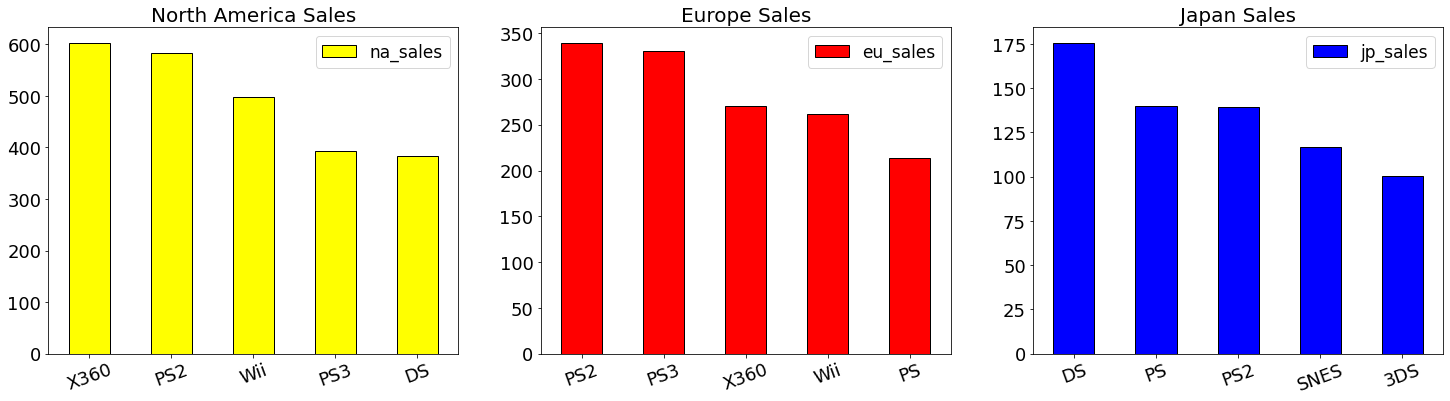

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Первичная информция о данных получена. 

Топы популярности:

NA - X360, PS2, Wii

EU - PS2, PS3, X360

JP - DS, PS, PS2

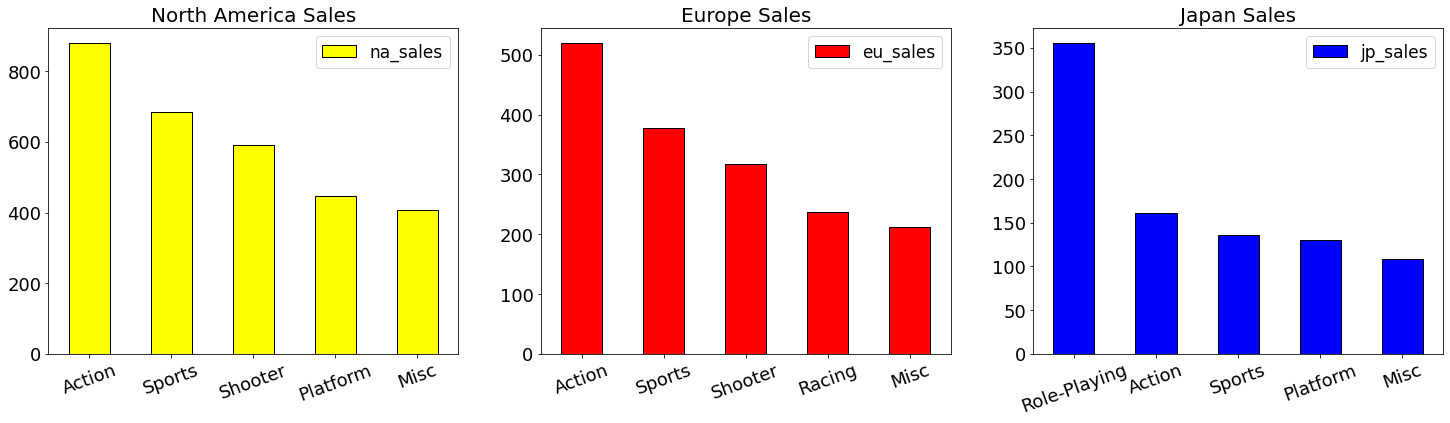

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Топы популярности жанров:

NA - Action, Sports, Shooter

EU - Action, Sports, Shooter

JP - Role-Playing, Action, Sports

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Япония наиболее уникальна среди регионов. 

Добавим столбец с рейтингом ESRB и рассмотрим графики

In [31]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех'}
data['ESRB_description'] = data[data['rating'].notnull()]['rating'].map(ESRB_dict)

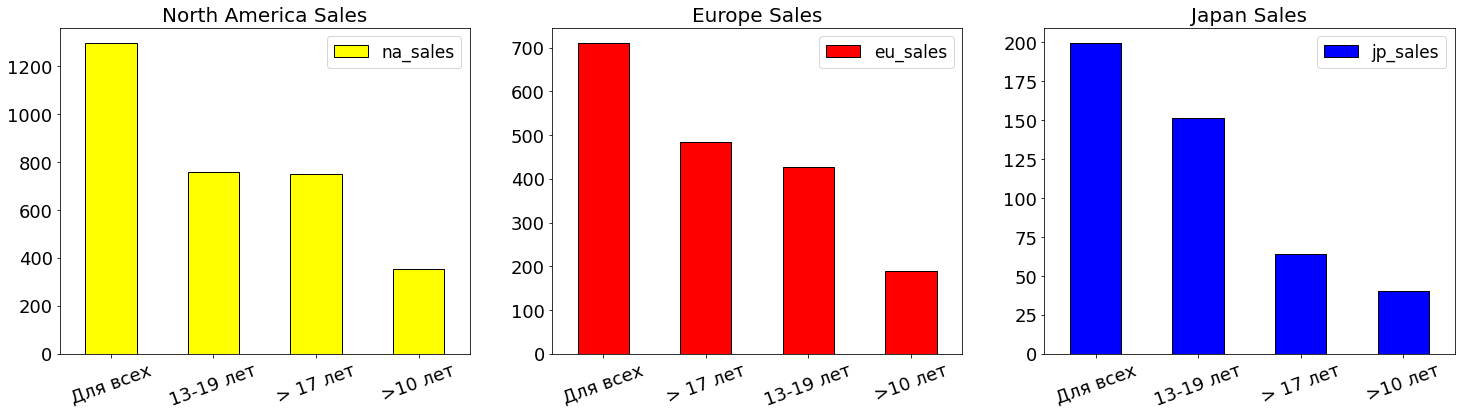

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

Топы возрастных рейтингов:

NA - Для всех, 13-19 лет, больше 17 лет

EU - Для всех, больше 17 лет, 13-19 лет 

JP - Для всех, 13-19 лет, больше 17 лет

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рассмотрев каждый из регионов мы пришли к выводу, что все они имеют свою специфику. 

## Проверка гипотез

Рассмотрим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

alpha=0.05
Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

#### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [33]:
alpha = 0.05
xbox_one_ratings = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc_ratings = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']
results = ttest_ind(xbox_one_ratings, pc_ratings)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print(results.pvalue)

Отвергаем нулевую гипотезу
1.3896188023184886e-05


Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Гипотезы сформулированы и верно определен метод проверки. С выводами согласен 

#### Гипотеза 2 - редние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.

альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [34]:
action_ratings = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
pc_ratings = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']
results = ttest_ind(action_ratings, pc_ratings)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports одинаковые

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Аналогично

## Общий вывод

Наблюдаются следующие тенденции:
- Самые популярные жанры - Action и Sports
- Самые популярные платформы - стационарные игровые консоли
- Наблюдается тренд сокращения "срока жизни" игровых консолей
- оценки критиков влияют на сборы, в то время как оценки пользователей нет

Таким образом, предполагаемую стратегию можно разбить на пункта "рабочая лошадь" и "фишка"

Рабочая лошадь - основные деньги индустрии находятся в играх, разработанных специально для новых платформ-гигантов индустрии (Playstation, Xbox). Для капитализации этого тренда, необходимо сосредоточиться на больших релизах для этих платформ в жанрах Action и Sports. Большие объемы продаж данных жанров помогут отбить траты на маркетинговые компании

Фишка - рассмотрев рынок Азии, можно обратить внимание, что жанр Roleplaying является весьма популряным в этом регионе. Можно рассмотреть стратегию, при которой компания не будет пытаться ехать на волне существующих трендов (что рискованно, т.к. рынок уже разобран гигантами), а попытаться сделать ставку на что-то новое в еще не супер популярном жанре ("roleplaying", "platform"). Это рискованная стратегия, так как нету гарантий, однако если удастться создать качественный продукт и правильно его рекламировать, можно будет выкроить для себя нишу с новыми верными потребителями

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Итоговый вывод стал отличным дополнением к проекту. С таким выводом мы тоно сможем составить прогноз продаж на 2017 год. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобрался с предобработкой данных. Твои выводы вполне логичны и все на своих местах. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Добавить причины появления пропусков. 
* Сделать поиск дубликатов.
* Промежуточные выводы добавить.
* Актуальный период подправить. 
* Ящик с усами доработать.
* Найти и определить самый успешный жанр по медиане или среднему. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>